In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('C:/Users/welcome/Desktop/python/perrin-freres-monthly-champagne-.csv')

In [9]:
df.head()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
df.tail()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [11]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [13]:
df.tail()


,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [14]:
df.drop(105,axis=0,inplace=True)


In [15]:
df.tail()


,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [16]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [17]:
df.head()


,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [18]:
df.set_index('Month',inplace=True)


In [19]:
df.head()


,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualize the Data

<Axes: xlabel='Month'>

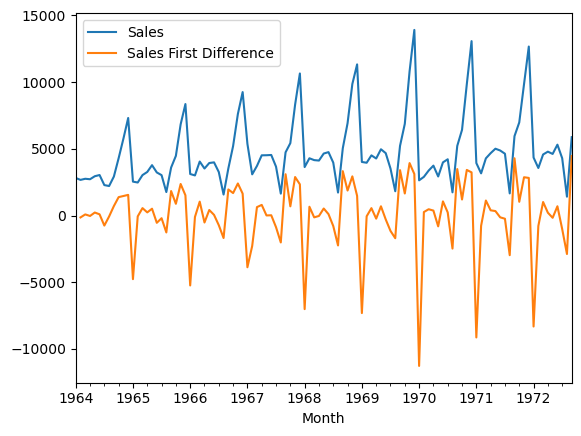

In [34]:
df.plot()

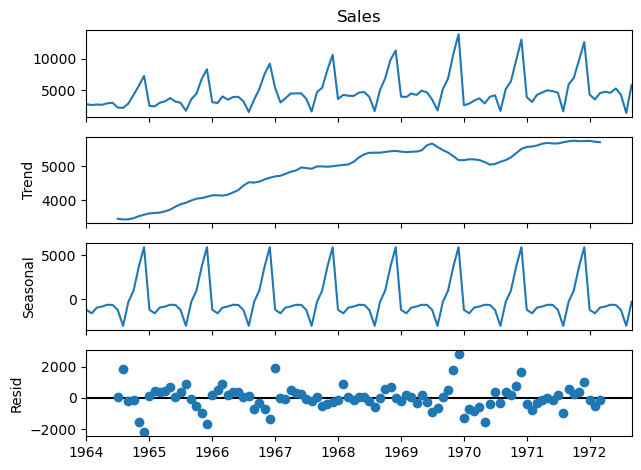

In [35]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df['Sales'],model='addictive')
fig=decomposition.plot()
plt.show()

In [36]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [37]:
test_result=adfuller(df['Sales'])


In [38]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [39]:
adfuller_test(df['Sales'])


ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [26]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [27]:
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Your code to generate and display the DataFrame
df['Sales'].shift(1) 


Month
1964-01-01        NaN
1964-02-01     2815.0
1964-03-01     2672.0
1964-04-01     2755.0
1964-05-01     2721.0
1964-06-01     2946.0
1964-07-01     3036.0
1964-08-01     2282.0
1964-09-01     2212.0
1964-10-01     2922.0
1964-11-01     4301.0
1964-12-01     5764.0
1965-01-01     7312.0
1965-02-01     2541.0
1965-03-01     2475.0
1965-04-01     3031.0
1965-05-01     3266.0
1965-06-01     3776.0
1965-07-01     3230.0
1965-08-01     3028.0
1965-09-01     1759.0
1965-10-01     3595.0
1965-11-01     4474.0
1965-12-01     6838.0
1966-01-01     8357.0
1966-02-01     3113.0
1966-03-01     3006.0
1966-04-01     4047.0
1966-05-01     3523.0
1966-06-01     3937.0
1966-07-01     3986.0
1966-08-01     3260.0
1966-09-01     1573.0
1966-10-01     3528.0
1966-11-01     5211.0
1966-12-01     7614.0
1967-01-01     9254.0
1967-02-01     5375.0
1967-03-01     3088.0
1967-04-01     3718.0
1967-05-01     4514.0
1967-06-01     4520.0
1967-07-01     4539.0
1967-08-01     3663.0
1967-09-01     1643.0
1967

<Axes: xlabel='Month'>

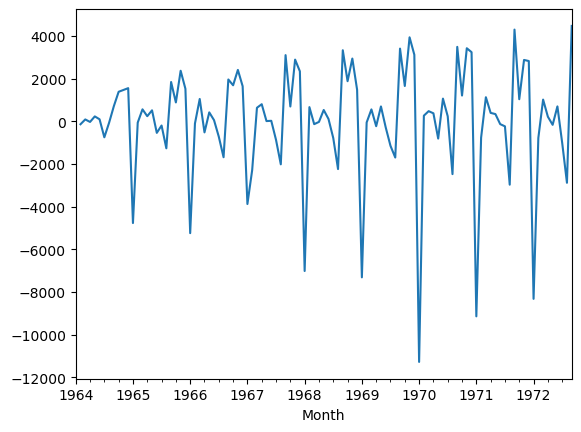

In [30]:
df['Sales First Difference'].plot()

In [40]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.189896448051016
p-value : 2.519620447386879e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)


In [42]:
df.head(14)


,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [79]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

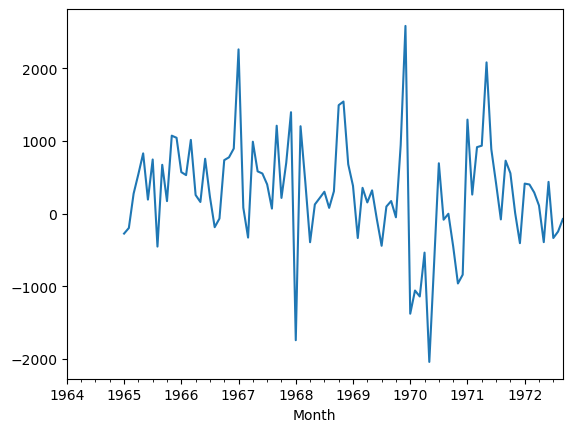

In [80]:
df['Seasonal First Difference'].plot()


#  Auto Regressive Model 

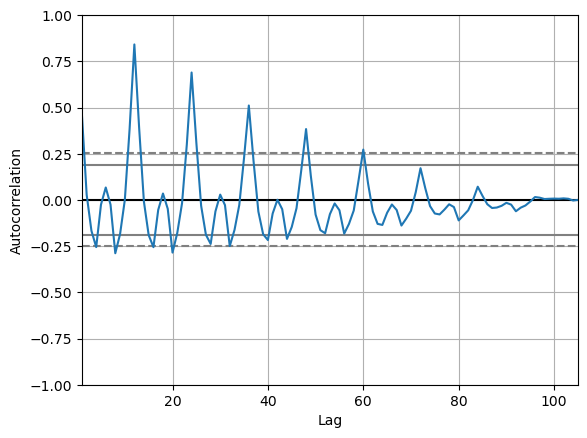

In [81]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# Final Thoughts on Autocorrelation and Partial Autocorrelation  

* Identification of an AR model is often best done with the PACF.

  * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
  
 
* Identification of an MA model is often best done with the ACF rather than the PACF.

   * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.


In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


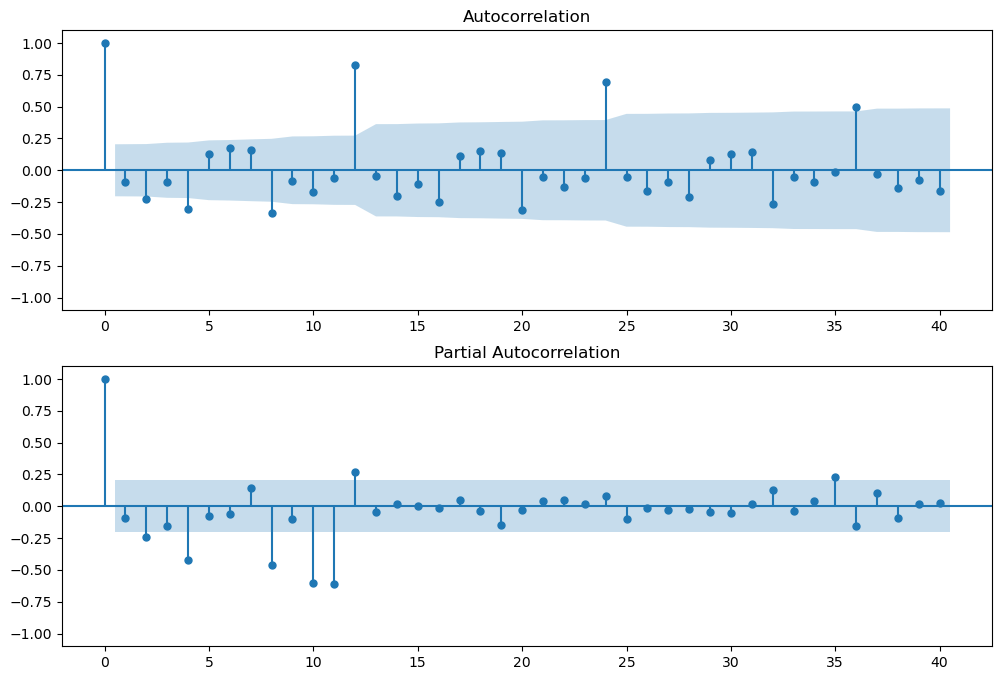

In [83]:
# Assuming df['Sales First Difference'] is defined
fig = plt.figure(figsize=(12,8))

# ACF plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax1)
ax1.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits

# PACF plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax2)
ax2.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
print()

In [84]:
# For non-seasonal data
#p=2, d=1, q=2 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [202]:
s=round(len(df)*90/100)
train=df[:s]
test=df[s:]

In [85]:
model=ARIMA(train['Sales'],order=(2,1,2))
model_fit=model.fit()
 

C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -947.569
Date:                Fri, 01 Mar 2024   AIC                           1905.139
Time:                        14:45:57   BIC                           1918.361
Sample:                    01-01-1964   HQIC                          1910.495
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2342      0.146     -1.609      0.108      -0.519       0.051
ar.L2          0.1578      0.124      1.273      0.203      -0.085       0.401
ma.L1         -0.1116      0.103     -1.088      0.277      -0.313       0.089
ma.L2         -0.8161      0.115     -7.112      0.000      -1.041      -0.591
sigma2       4.71e+06   6.17e+05      7.633      0.000     3.5e+06    5.92e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.95   Prob(JB):                         0.54
Heteroskedasticity (H):               3.49   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,5109.781921
1972-06-01,5312.0,694.0,438.0,5118.235705
1972-07-01,4298.0,-1014.0,-335.0,5113.578524
1972-08-01,1413.0,-2885.0,-246.0,5116.003641
1972-09-01,5877.0,4464.0,-74.0,5114.700556


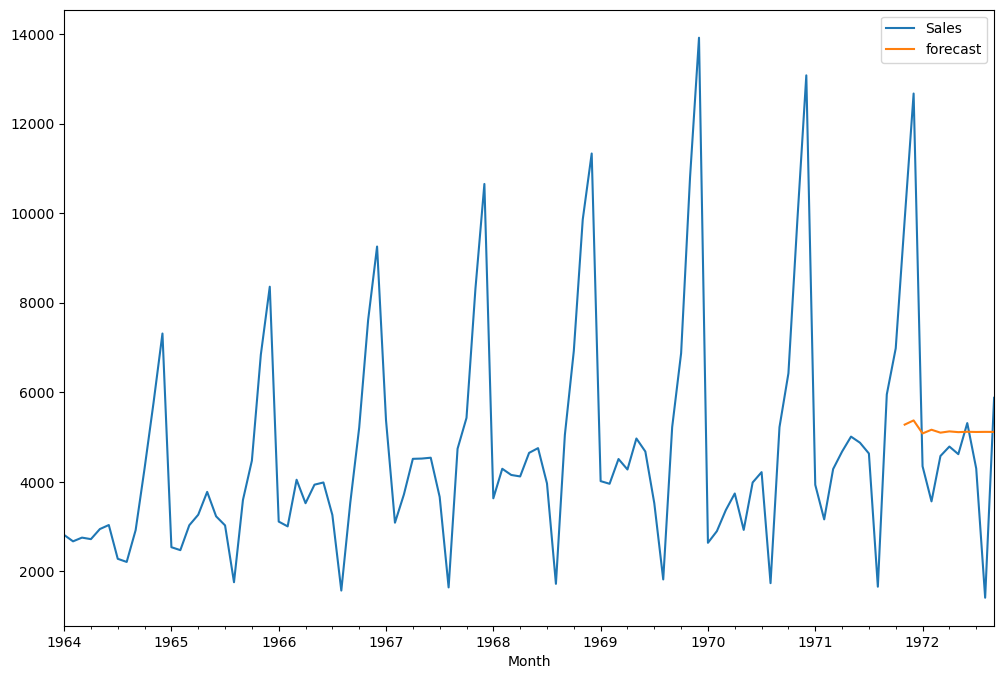

In [203]:
df['forecast']=model_fit.predict(start=test.index[0],end=test.index[-1],dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
df.tail()

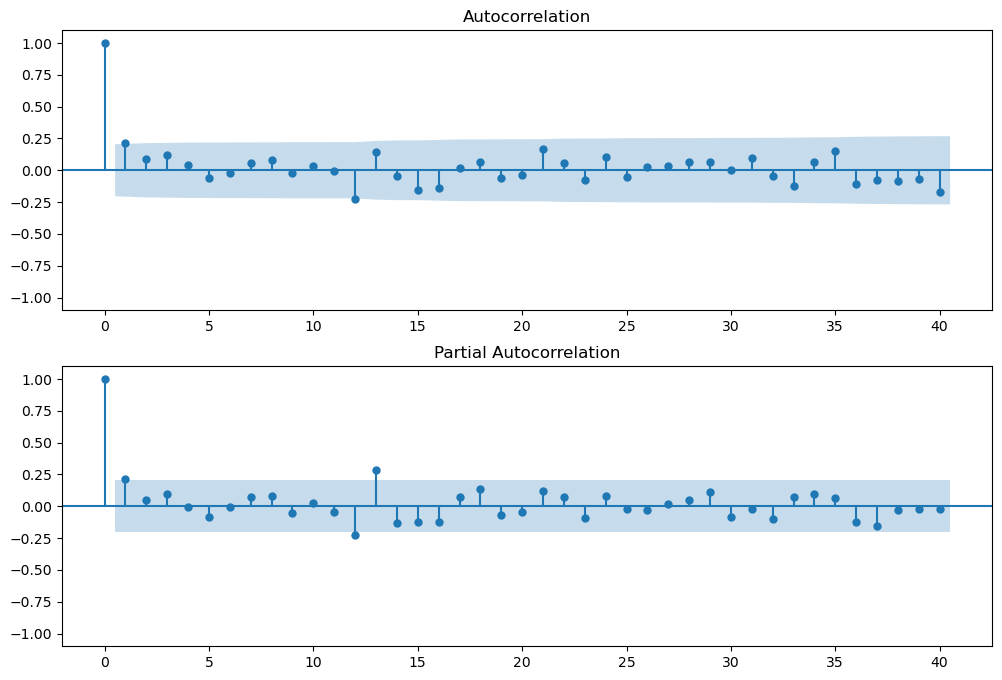

In [94]:
# Assuming df['Seasonal First Difference'] is defined
fig = plt.figure(figsize=(12,8))

# ACF plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax1.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits

# PACF plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)
ax2.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
print()

In [95]:
import statsmodels.api as sm

In [215]:
model=SARIMAX(train['Sales'],order=(2, 1, 2),seasonal_order=(1,0,1,12))
results1=model.fit()

C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

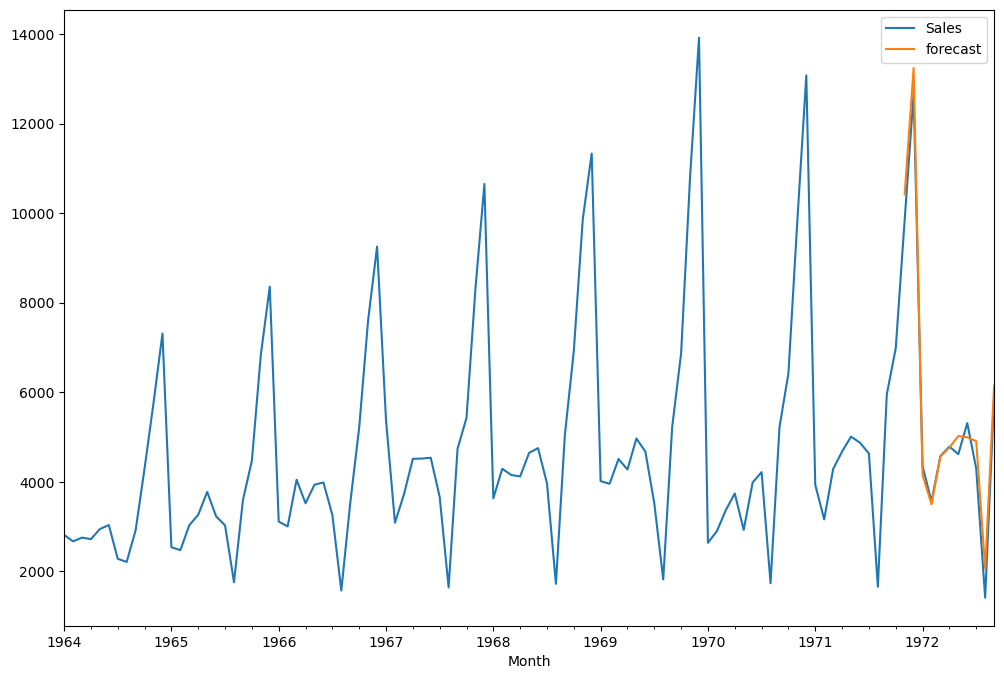

In [206]:
df['forecast']=results.predict(start=test.index[0],end=test.index[-1],dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [208]:
test[['Sales','forecast']]

,Sales,forecast
Month,,
1971-11-01,9851.0,9775.426262
1971-12-01,12670.0,12796.572045
1972-01-01,4348.0,3902.830830
1972-02-01,3564.0,3301.601758
1972-03-01,4577.0,4282.770257
1972-04-01,4788.0,4637.596595
1972-05-01,4618.0,4829.977164
1972-06-01,5312.0,4835.563175
1972-07-01,4298.0,4525.522525


In [214]:
from sklearn.metrics import mean_squared_error
print(df['Sales'].mean())
np.sqrt(mean_squared_error(test['Sales'].dropna(),df['forecast'].dropna()))

4761.152380952381


406.33058138897894

In [217]:
from pandas.tseries.offsets import DateOffset
m=5
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,m)]

In [218]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [219]:
future_datest_df.tail()


,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN


In [179]:
future_df=pd.concat([df,future_datest_df])

C:\Users\welcome\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

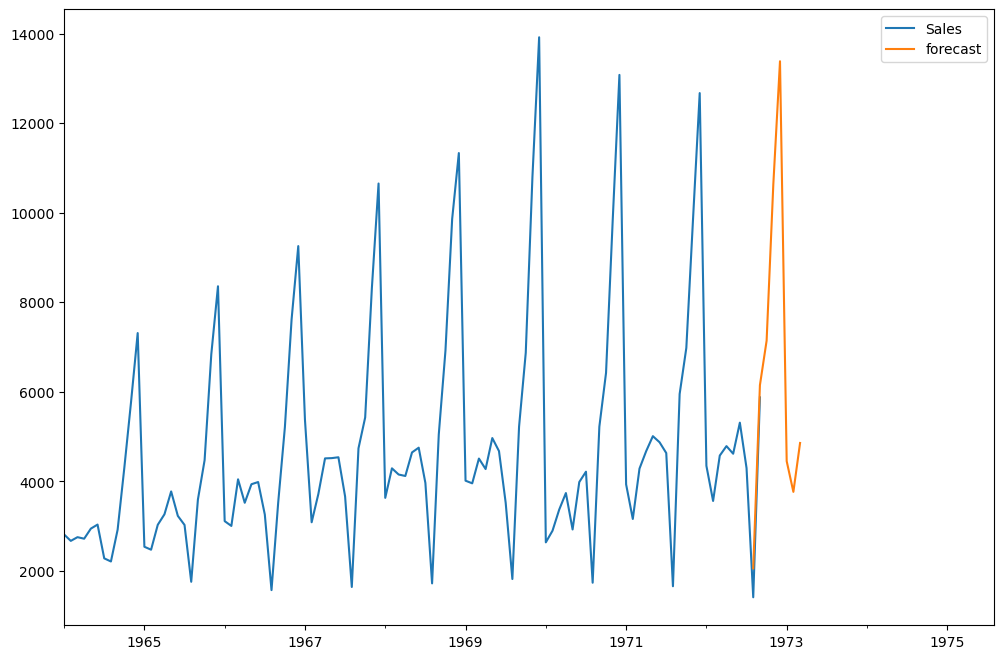

In [235]:
future_df['forecast'] = results1.predict(start = len(df)-2, end = len(df)+m, dynamic= True)  

future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [228]:
a = future_df['forecast']['1972-09-01']
print(a)

6149.89977818213


In [224]:
future_df[['Sales','forecast']].tail(40)

,Sales,forecast
1972-05-01,4618.0,NaN
1972-06-01,5312.0,NaN
1972-07-01,4298.0,NaN
1972-08-01,1413.0,NaN
1972-09-01,5877.0,6149.899778
1972-10-01,NaN,7141.673078
1972-11-01,NaN,10626.901610
1972-12-01,NaN,13380.790766
1973-01-01,NaN,4451.974507
1973-02-01,NaN,3766.035946


In [225]:
future_df.loc['1973-01-01',['Sales','forecast']]

Sales               NaN
forecast    4451.974507
Name: 1973-01-01 00:00:00, dtype: float64

In [226]:
forecast_1975 = future_df['forecast']['1973-08-01']

# Display the forecasted values for the year 1975
print(forecast_1975)

nan


In [227]:
future_df[['Sales','forecast']]

,Sales,forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN
1964-10-01,4301.0,NaN
